In [ ]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install transformers seqeval git-lfs matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install Datasets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install accelerate>=0.21.0 -U tensorflow==2.15

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn accelerate pandas==2.0.3 torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


Cleaned TRAIN DATA Samples:
                                        cleaned_text
0  vegan instagram users are pinning the 2019 cor...
1  glenn beck rekindled a falsehood about the siz...
2  vice president mike pence says that when it co...
3  a conservative website falsely claimed that us...
4  hundreds of rhode islanders got phone calls la...

Cleaned TEST DATA Samples:
                                        cleaned_text
0  sen  blanche lincolns narrow victory in the ar...
1  democrats like to parry republican criticism o...
2  as the battle over health care reform approach...
3  the nuclear posture review released by the oba...
4  in a video on his campaign web site gubernator...

Cleaned DEV DATA Samples:
                                        cleaned_text
0  in an interview making the rounds on the inter...
1  a chain email written by former attorney micha...
2  the day before the us house of representatives...
3  on abcs this week on sept 26 2010 david axelro...
4  weve gotten a

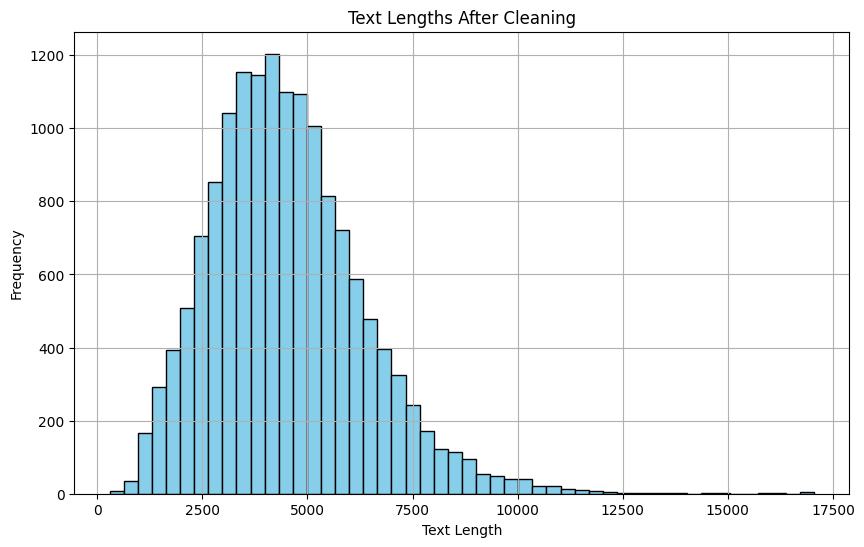

In [ ]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt


# Correct paths for each dataset file
train_file = '/kaggle/input/training/liar_train.csv'
test_file = '/kaggle/input/testing/liar_test.csv'
dev_file = '/kaggle/input/develop/liar_dev.csv'

# Load the datasets
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
dev_df = pd.read_csv(dev_file)

# Define a function to clean the tweet text
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Lowercase the text
    tweet = tweet.lower()
    return tweet


# Preprocess data
train_df['cleaned_text'] = train_df['fullText_based_content'].apply(clean_tweet)
test_df['cleaned_text'] = test_df['fullText_based_content'].apply(clean_tweet)
dev_df['cleaned_text'] = dev_df['fullText_based_content'].apply(clean_tweet)

# Print few lines of cleaned TRAIN DATA after preprocessing
print("Cleaned TRAIN DATA Samples:")
print(train_df[['cleaned_text']].head())

# Print few lines of cleaned TEST DATA after preprocessing
print("\nCleaned TEST DATA Samples:")
print(test_df[['cleaned_text']].head())

# Print few lines of cleaned DEV DATA after preprocessing
print("\nCleaned DEV DATA Samples:")
print(dev_df[['cleaned_text']].head())

# Function to plot histogram of text lengths
def plot_text_length_histogram(df, title):
    text_lengths = df['cleaned_text'].str.len()
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms of text lengths before and after cleaning

plot_text_length_histogram(train_df, 'Text Lengths After Cleaning')

# Save the cleaned DataFrames as .csv files
train_df.to_csv('cleaned_train_data.csv', index=False)
test_df.to_csv('cleaned_test_data.csv', index=False)
dev_df.to_csv('cleaned_dev_data.csv', index=False)



In [ ]:
#COMPLETE DATA
print(train_df.head())

      id                       date  \
0  18178  2020-03-18T13:26:42-04:00   
1   3350  2011-03-04T09:12:59-05:00   
2  14343  2017-07-21T11:52:44-04:00   
3  15579  2018-07-10T15:52:26-04:00   
4   3690  2011-05-04T16:31:24-04:00   

                                       speaker  \
0                              Instagram posts   
1                                   Glenn Beck   
2                                   Mike Pence   
3                                     Bloggers   
4  National Republican Congressional Committee   

                                           statement  \
0         "COVID-19 started because we eat animals."   
1  Says Michelle Obama has 43 people on her staff...   
2  Says President Donald Trump "has signed more l...   
3  "US representatives promise implement of UN gu...   
4  "The federal government borrows $4 billion eve...   

                                             sources  \
0  ['https://www.cdc.gov/coronavirus/2019-ncov/ca...   
1  ['http://www

In [ ]:
import os

# Base directory where datasets are generally stored in Kaggle
base_directory = '/kaggle/input/'

# Recursively print all directories and files under the base directory
for dirname, dirpaths, filenames in os.walk(base_directory):
    print("Directory:", dirname)
    for filename in filenames:
        print("File:", filename)


Directory: /kaggle/input/
Directory: /kaggle/input/develop
File: liar_dev.csv
Directory: /kaggle/input/training
File: liar_train.csv
Directory: /kaggle/input/testing
File: liar_test.csv


In [ ]:
import pandas as pd

# Correct paths for each dataset file
train_file = '/kaggle/input/training/liar_train.csv'
test_file = '/kaggle/input/testing/liar_test.csv'
dev_file = '/kaggle/input/develop/liar_dev.csv'

# Load the datasets
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
dev_df = pd.read_csv(dev_file)

print("Files loaded successfully:")
print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)
print("Dev DataFrame shape:", dev_df.shape)


Files loaded successfully:
Train DataFrame shape: (15052, 8)
Test DataFrame shape: (1266, 8)
Dev DataFrame shape: (1265, 8)


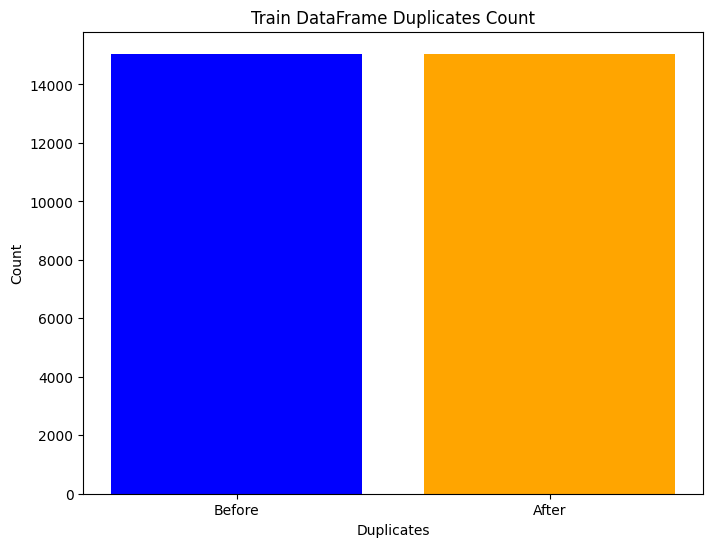

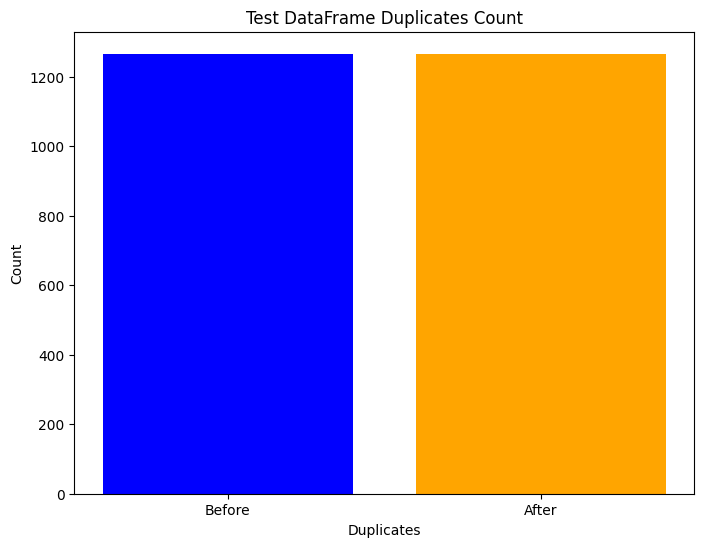

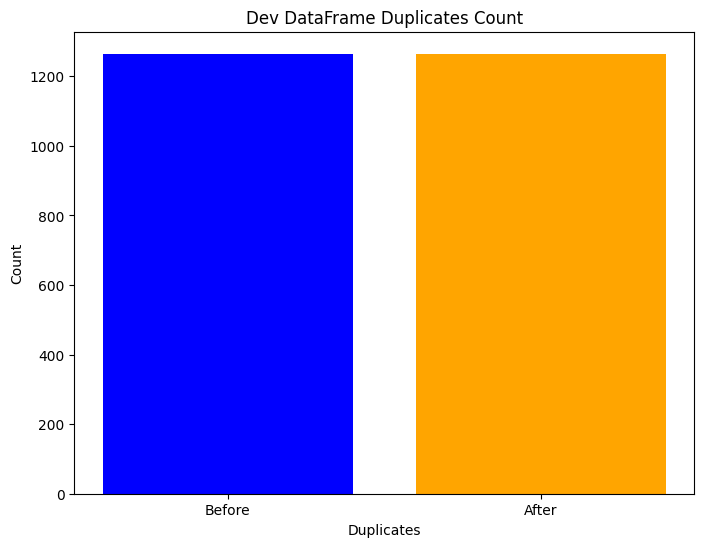

In [ ]:
import matplotlib.pyplot as plt
# Function to plot bar chart
# Correct paths for each dataset file
train_file = '/kaggle/input/training/liar_train.csv'
test_file = '/kaggle/input/testing/liar_test.csv'
dev_file = '/kaggle/input/develop/liar_dev.csv'

# Load the datasets
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
dev_df = pd.read_csv(dev_file)


def plot_duplicates_count(df, title):
    unique_count_before = len(df)
    df.drop_duplicates(inplace=True)
    unique_count_after = len(df)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.bar(['Before', 'After'], [unique_count_before, unique_count_after], color=['blue', 'orange'])
    plt.title(title)
    plt.xlabel('Duplicates')
    plt.ylabel('Count')
    plt.show()

# Plot count of duplicates for train DataFrame
plot_duplicates_count(train_df, 'Train DataFrame Duplicates Count')

# Plot count of duplicates for test DataFrame
plot_duplicates_count(test_df, 'Test DataFrame Duplicates Count')

# Plot count of duplicates for dev DataFrame
plot_duplicates_count(dev_df, 'Dev DataFrame Duplicates Count')

In [ ]:
print(train_df.columns)

Index(['id', 'date', 'speaker', 'statement', 'sources',
       'paragraph_based_content', 'fullText_based_content', 'label-liar',
       'cleaned_text'],
      dtype='object')


In [ ]:
import pandas as pd

# Check column names in each DataFrame
print("\nColumn names in TRAIN DF:", train_df.columns)
print("\nColumn names in TEST DF:", test_df.columns)
print("\nColumn names in DEV DF:", dev_df.columns)


Column names in TRAIN DF: Index(['id', 'date', 'speaker', 'statement', 'sources',
       'paragraph_based_content', 'fullText_based_content', 'label-liar',
       'cleaned_text'],
      dtype='object')

Column names in TEST DF: Index(['id', 'date', 'speaker', 'statement', 'sources',
       'paragraph_based_content', 'fullText_based_content', 'label-liar',
       'cleaned_text'],
      dtype='object')

Column names in DEV DF: Index(['id', 'date', 'speaker', 'statement', 'sources',
       'paragraph_based_content', 'fullText_based_content', 'label-liar',
       'cleaned_text'],
      dtype='object')


In [ ]:
# Count the occurrences of each label in TRAIN DATA
train_label_counts = train_df['label-liar'].value_counts()

# Count the occurrences of each label in TEST DATA
test_label_counts = test_df['label-liar'].value_counts()

# Count the occurrences of each label in DEV DATA
dev_label_counts = dev_df['label-liar'].value_counts()

# Display the counts
print("TRAIN DATA Label Counts:")
print(train_label_counts)

print("\nTEST DATA Label Counts:")
print(test_label_counts)

print("\nDEV DATA Label Counts:")
print(dev_label_counts)


TRAIN DATA Label Counts:
label-liar
false          3280
half-true      2833
mostly-true    2631
barely-true    2483
true           2050
pants-fire     1775
Name: count, dtype: int64

TEST DATA Label Counts:
label-liar
half-true      266
false          249
mostly-true    239
barely-true    212
true           208
pants-fire      92
Name: count, dtype: int64

DEV DATA Label Counts:
label-liar
false          280
half-true      240
mostly-true    226
barely-true    202
true           172
pants-fire     145
Name: count, dtype: int64


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from torch.nn import Dropout, Linear, Sequential
from torch.optim import AdamW
import torch.nn as nn
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Load the datasets
train_file = '/kaggle/working/cleaned_train_data.csv'
test_file = '/kaggle/working/cleaned_test_data.csv'
dev_file = '/kaggle/working/cleaned_dev_data.csv'
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
dev_df = pd.read_csv(dev_file)

# Define the mapping from categorical labels to binary labels
label_mapping = {
    'true': 0, 'pants-fire': 1, 'false': 2,
    'barely-true': 3, 'half-true': 4, 'mostly-true': 5
}
# Replace the labels and explicitly convert to integer
train_df['binary_label'] = train_df['label-liar'].replace(label_mapping).astype(int)
test_df['binary_label'] = test_df['label-liar'].replace(label_mapping).astype(int)
dev_df['binary_label'] = dev_df['label-liar'].replace(label_mapping).astype(int)

# Load SBERT model and compute embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
train_embeddings = model.encode(train_df['cleaned_text'].tolist(), convert_to_numpy=True, show_progress_bar=False)
test_embeddings = model.encode(test_df['cleaned_text'].tolist(), convert_to_numpy=True, show_progress_bar=False)
dev_embeddings = model.encode(dev_df['cleaned_text'].tolist(), convert_to_numpy=True, show_progress_bar=False)

# Convert embeddings and labels to tensors
train_embeddings = torch.tensor(train_embeddings).float()
test_embeddings = torch.tensor(test_embeddings).float()
dev_embeddings = torch.tensor(dev_embeddings).float()
train_labels = torch.tensor(train_df['binary_label'].values)
test_labels = torch.tensor(test_df['binary_label'].values)
dev_labels = torch.tensor(dev_df['binary_label'].values)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_embeddings, train_labels)
test_dataset = TensorDataset(test_embeddings, test_labels)
dev_dataset = TensorDataset(dev_embeddings, dev_labels)
batch_size = 32
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)
dev_dataloader = DataLoader(dev_dataset, sampler=SequentialSampler(dev_dataset), batch_size=batch_size)

# Define the classifier model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(Classifier, self).__init__()
        self.classifier = Sequential(
            Dropout(0.1),
            Linear(input_dim, num_labels)
        )

    def forward(self, x):
        return self.classifier(x)

# Model setup
model = Classifier(input_dim=384, num_labels=6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Training and validation
epochs = 100
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for embeddings, labels in train_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(embeddings)
        loss = nn.functional.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_dataloader))

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for embeddings, labels in dev_dataloader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            outputs = model(embeddings)
            predicted = outputs.argmax(dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracies.append(correct / total)

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_dataloader)}, Accuracy: {correct / total}")
    torch.save(model.state_dict(), 'model_state.pth')
from IPython.display import FileLink
# Create a link to download the file
print(f"THIS IS THE DOWNLOAD LINK OF THE TRAINED MODEL")
FileLink('model_state.pth')



Epoch 1, Loss: 1.7864920705746694, Accuracy: 0.22371541501976286
Epoch 2, Loss: 1.7805974377188714, Accuracy: 0.22450592885375495
Epoch 3, Loss: 1.775232741280979, Accuracy: 0.22134387351778656
Epoch 4, Loss: 1.7703672953725114, Accuracy: 0.22213438735177865
Epoch 5, Loss: 1.76613152634566, Accuracy: 0.22055335968379447
Epoch 6, Loss: 1.7621145577440849, Accuracy: 0.22292490118577074
Epoch 7, Loss: 1.758519364770051, Accuracy: 0.22450592885375495
Epoch 8, Loss: 1.7552385299828401, Accuracy: 0.22529644268774704
Epoch 9, Loss: 1.752100459835838, Accuracy: 0.2300395256916996
Epoch 10, Loss: 1.7492373012433386, Accuracy: 0.22924901185770752
Epoch 11, Loss: 1.7465300610617214, Accuracy: 0.23241106719367588
Epoch 12, Loss: 1.743893074381883, Accuracy: 0.2316205533596838
Epoch 13, Loss: 1.7415094443946888, Accuracy: 0.23241106719367588
Epoch 14, Loss: 1.7391125507921676, Accuracy: 0.23241106719367588
Epoch 15, Loss: 1.7368478306792596, Accuracy: 0.23478260869565218
Epoch 16, Loss: 1.734557600

/kaggle/working/model_state.pth

In [ ]:
#User Input to Predict Truthfulness of an NewsArticle
import torch
import torch.nn as nn
from sentence_transformers import SentenceTransformer
from torch.utils.data import DataLoader, TensorDataset, SequentialSampler
import pandas as pd

# Define the classifier model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_labels):
        super(Classifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(input_dim, num_labels)
        )

    def forward(self, x):
        return self.classifier(x)

# Load the model
model = Classifier(input_dim=384, num_labels=6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('model_state.pth'))
model.to(device)
model.eval()

# Load the SBERT model for embedding
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

def predict_text_authenticity(text):
    # Generate embeddings
    embeddings = sbert_model.encode([text], convert_to_numpy=True)
    embeddings = torch.tensor(embeddings).float().to(device)

    # Predict with the classifier
    with torch.no_grad():
        outputs = model(embeddings)
        predicted = outputs.argmax(dim=1).item()

    # Map predicted label index to label name
    label_mapping = {
        0: 'true', 1: 'pants-fire', 2: 'false',
        3: 'barely-true', 4: 'half-true', 5: 'mostly-true'
    }
    return label_mapping[predicted]

def main():
    while True:
        user_input = input("Enter a sentence to predict its truthfulness or type 'exit' to quit:\n")
        if user_input.lower() == 'exit':
            break
        prediction = predict_text_authenticity(user_input)
        print(f"The sentence is predicted to be: {prediction}\n")

if __name__ == "__main__":
    main()


Enter a sentence to predict its truthfulness or type 'exit' to quit:
 Four years as a congressman, he [U.S. Rep. Hank Johnson] never talked  about MARTA.""",['http://appropriations.house.gov/images/stories/pdf/tranurb/Hank_Johnson.4.15.10.pdf'],"['The population growth spurt in southeast DeKalb County over the past two  decades has resulted in a grim reality: Traffic can be torture.', ""In  recent years, elected officials have talked about extending the  region's rail service, MARTA, farther east in DeKalb to make commuting  easier for area residents."", 'Vernon Jones, a Democrat and former  DeKalb County CEO who is running for Congress to represent the area, has  complained incumbent Democratic U.S. Rep. Hank Johnson has not done  enough to help MARTA since the congressman went to Washington in 2007.', 'Here\'s  one verbal volley by Jones from a June 3 candidate forum in southeast  Atlanta: ""Four years as a congressman, he [Johnson] never talked about  MARTA.""', ""Never? Isn't that 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The sentence is predicted to be: false



Enter a sentence to predict its truthfulness or type 'exit' to quit:
 The claim that the United States has spent $500 billion in Iraq is not entirely accurate, but it, too, is pretty darn close.  Estimates vary on the precise amount spent since the 2003 invasion, but two of the most credible sources, the Congressional Research Service and the Congressional Budget Office, give the total as approximately $450 billion and $413 billion, respectively. Thus, Dodd's assertion that U.S. spending in Iraq has already passed the half trillion dollar mark is slightly exaggerated, but that's a quibble. His overall point that spending on aid to Latin America is only a small fraction of Iraq spending is very much on target


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The sentence is predicted to be: mostly-true



Enter a sentence to predict its truthfulness or type 'exit' to quit:
 quit


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

The sentence is predicted to be: pants-fire



Enter a sentence to predict its truthfulness or type 'exit' to quit:
 exit


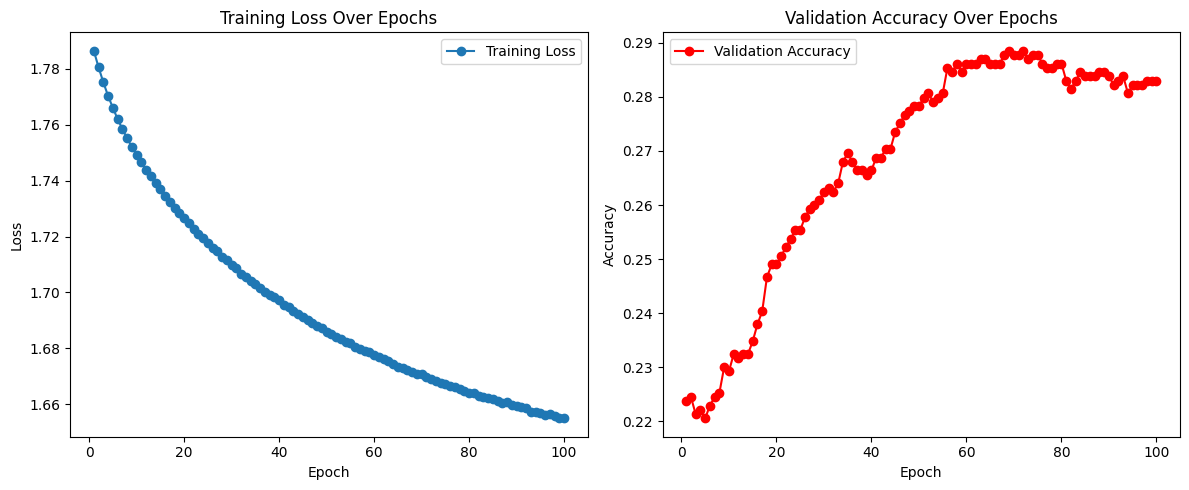

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training loss and validation accuracy
plt.figure(figsize=(12, 5))  # Set the figure size for better readability

# Plot for training loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Show legend

# Plot for validation accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy', marker='o', color='r')
plt.title('Validation Accuracy Over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Show legend

plt.tight_layout()  # Automatically adjust subplot params for better layout
plt.show()  # Display the plot


In [ ]:
# After training, evaluate on the test set
from sklearn.metrics import f1_score, precision_score, recall_score
model.eval()
true_labels = []
predictions = []

with torch.no_grad():
    for embeddings, labels in test_dataloader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        outputs = model(embeddings)
        predicted = outputs.argmax(dim=1)
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())

# Convert lists to numpy arrays for metric calculation
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Calculate F1 scores, Precision, and Recall for each class
f1_scores = f1_score(true_labels, predictions, average=None)
precisions = precision_score(true_labels, predictions, average=None)
recalls = recall_score(true_labels, predictions, average=None)

# Print metrics for each class
for label, f1, precision, recall in zip(label_mapping.keys(), f1_scores, precisions, recalls):
    print(f"Metrics for class '{label}':")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

# Calculate and print overall metrics
overall_precision = precision_score(true_labels, predictions, average='weighted')
overall_recall = recall_score(true_labels, predictions, average='weighted')
overall_f1_score = f1_score(true_labels, predictions, average='weighted')

print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-Score: {overall_f1_score:.4f}")


Metrics for class 'true':
  Precision: 0.5000
  Recall: 0.0144
  F1-Score: 0.0280

Metrics for class 'pants-fire':
  Precision: 0.4242
  Recall: 0.1522
  F1-Score: 0.2240

Metrics for class 'false':
  Precision: 0.2277
  Recall: 0.5341
  F1-Score: 0.3193

Metrics for class 'barely-true':
  Precision: 0.1111
  Recall: 0.0047
  F1-Score: 0.0090

Metrics for class 'half-true':
  Precision: 0.2588
  Recall: 0.3872
  F1-Score: 0.3102

Metrics for class 'mostly-true':
  Precision: 0.3178
  Recall: 0.3138
  F1-Score: 0.3158

Overall Precision: 0.2907
Overall Recall: 0.2599
Overall F1-Score: 0.2100


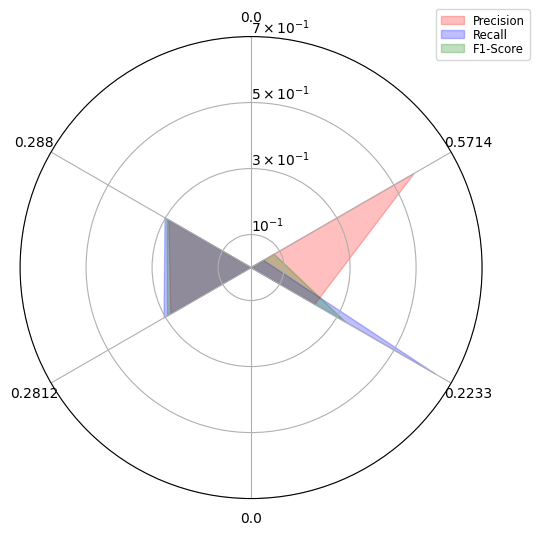

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Define the data for each class and metric
metrics = {
    'Precision': [0.0000, 0.5714, 0.2233, 0.0000, 0.2812, 0.2880],
    'Recall': [0.0000, 0.0435, 0.6466, 0.0000, 0.3045, 0.3013],
    'F1-Score': [0.0000, 0.0808, 0.3320, 0.0000, 0.2924, 0.2945]
}
classes = list(metrics['Precision'])

# Number of variables we're plotting
num_vars = len(classes)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is made circular, so we need to "complete the loop"
# and append the start to the end.
metrics['Precision'] += metrics['Precision'][:1]
metrics['Recall'] += metrics['Recall'][:1]
metrics['F1-Score'] += metrics['F1-Score'][:1]
angles += angles[:1]

# Draw the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, metrics['Precision'], color='red', alpha=0.25)
ax.fill(angles, metrics['Recall'], color='blue', alpha=0.25)
ax.fill(angles, metrics['F1-Score'], color='green', alpha=0.25)

# Draw one axe per variable and add labels
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw ylabels
ax.set_rscale('symlog')
ax.set_rticks([0.1, 0.3, 0.5, 0.7])  # Less radial ticks
ax.set_rlabel_position(0)  # Move radial labels away from the plot

# Add each class as a spoke on the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(classes)

# Add a legend with some customizations
legend = ax.legend(['Precision', 'Recall', 'F1-Score'], loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

plt.show()


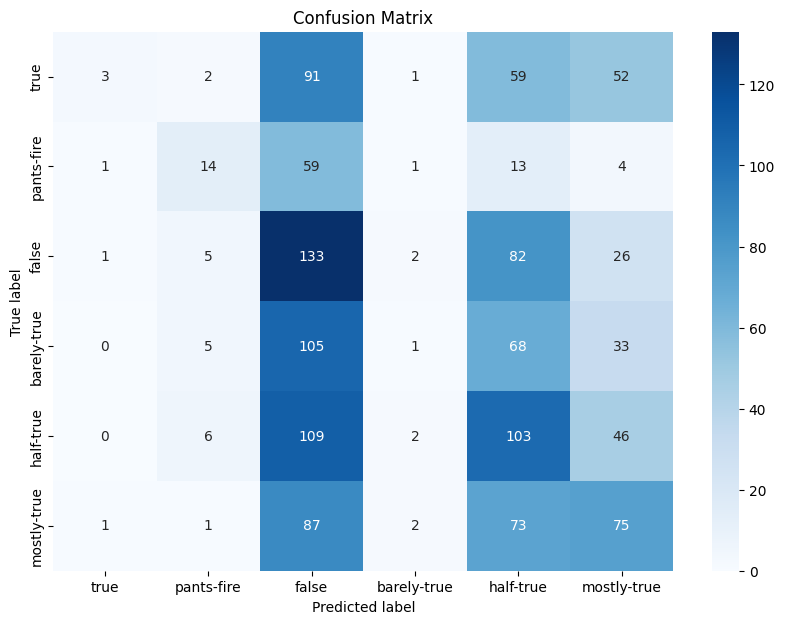

Classification Report:
               precision    recall  f1-score   support

        true       0.50      0.01      0.03       208
  pants-fire       0.42      0.15      0.22        92
       false       0.23      0.53      0.32       249
 barely-true       0.11      0.00      0.01       212
   half-true       0.26      0.39      0.31       266
 mostly-true       0.32      0.31      0.32       239

    accuracy                           0.26      1266
   macro avg       0.31      0.23      0.20      1266
weighted avg       0.29      0.26      0.21      1266



In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from torch.nn import Dropout, Linear, Sequential
from torch.optim import AdamW
import torch.nn as nn
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Assuming your predictions and labels are stored in predictions and true_labels respectively
y_true = test_labels.numpy()  # Convert to numpy array if needed
y_pred = np.array(predictions)  # Ensure predictions are numpy array for sklearn compatibility

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(label_mapping.keys())))



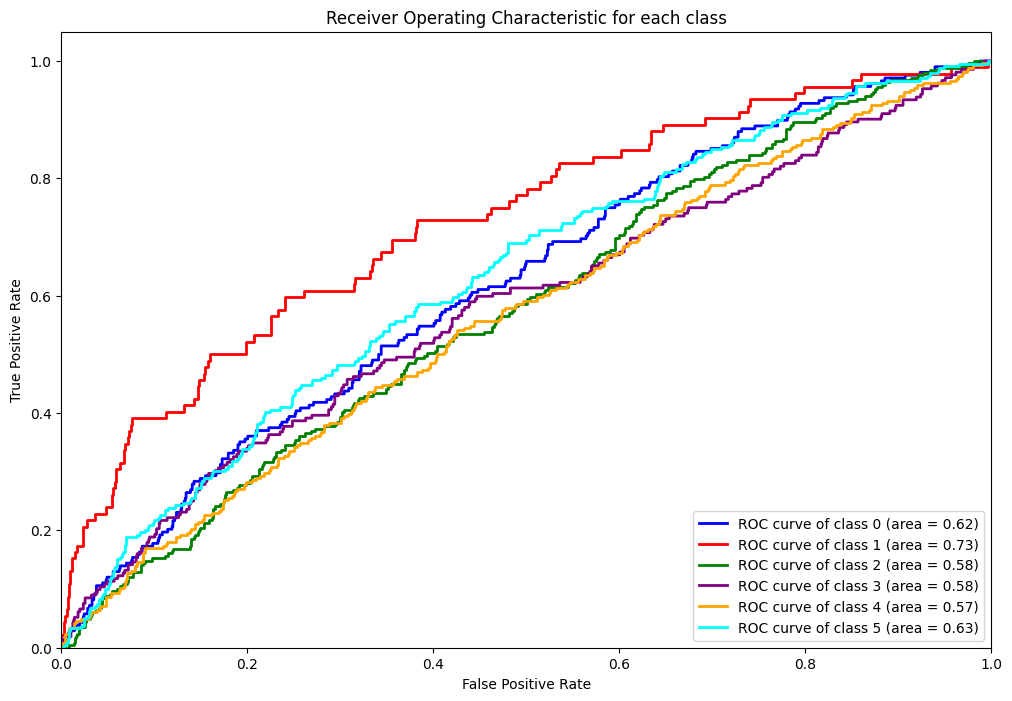

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from torch.utils.data import DataLoader

# Example of loading your model and dataloader setup
# Assume 'test_dataloader' is already defined and 'model' is your trained model

# Ensure your model is in evaluation mode
model.eval()

# Initialize lists to collect all true labels and probabilities
all_true_labels = []
all_probabilities = []

# Collect data
with torch.no_grad():
    for embeddings, labels in test_dataloader:
        embeddings = embeddings.to(device)  # Send data to the appropriate device
        labels = labels.to(device)

        outputs = model(embeddings)  # Get raw output from the model
        probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Convert logits to probabilities

        # Store probabilities and labels
        all_probabilities.extend(probabilities.cpu().numpy())  # Convert to numpy and store
        all_true_labels.extend(labels.cpu().numpy())  # Convert to numpy and store

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_probabilities = np.array(all_probabilities)

# Binarize the labels for ROC analysis
classes = np.array([0, 1, 2, 3, 4, 5])  # Adjust based on your label mapping
y_true_binarized = label_binarize(all_true_labels, classes=classes)

# Plotting ROC curve for each class
plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']  # Colors for each line

for i, color in zip(range(len(classes)), colors):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], all_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'ROC curve of class {classes[i]} (area = {roc_auc:.2f})')

#plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()
